In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('marital status.csv')
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [7]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [8]:
handle=df['status'].median()
handle

0.0

In [9]:
df.status=df.status.fillna(handle)
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [10]:
x=df.iloc[:,:-1].values
x

array([[21],
       [33],
       [24],
       [28],
       [17],
       [33],
       [23],
       [30],
       [29],
       [22],
       [26],
       [20],
       [22],
       [24],
       [34],
       [29],
       [16],
       [18],
       [26],
       [25]], dtype=int64)

In [11]:
y=df.iloc[:,-1].values
y

array([0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1.])

In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=1/3,random_state=1) 

In [14]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(xtrain,ytrain)

LogisticRegression()

In [15]:
regressor.predict([[30]])

array([1.])

In [16]:
y_pred=regressor.predict(xtest)

In [17]:
df['y_pred']=regressor.predict(x)
df.head()

,age,status,y_pred
0,21,0.0,0.0
1,33,1.0,1.0
2,24,0.0,0.0
3,28,1.0,1.0
4,17,0.0,0.0


In [18]:
regressor.score(x,y)

0.8

In [19]:
regressor.predict_proba(xtest)

array([[0.28823441, 0.71176559],
       [0.98955812, 0.01044188],
       [0.79723672, 0.20276328],
       [0.50131505, 0.49868495],
       [0.71391911, 0.28608089],
       [0.02578902, 0.97421098],
       [0.98364637, 0.01635363]])

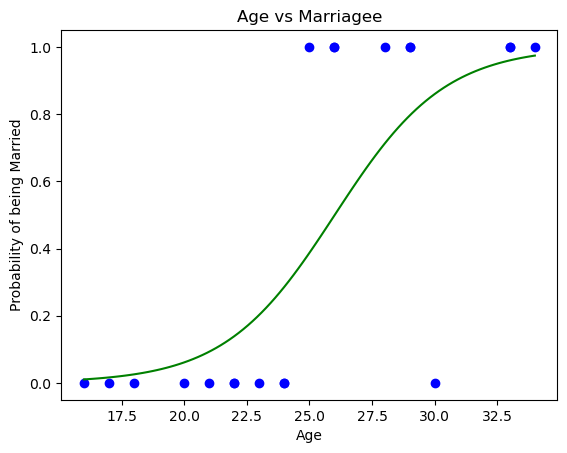

In [21]:
ages=np.linspace(x[:,0].min(),x[:,0].max(),100).reshape(-1,1)
y_curve=regressor.predict_proba(ages)[:,-1]

plt.scatter(x[:,0],y,color='blue')
plt.plot(ages,y_curve,color='green')
plt.title('Age vs Marriagee')
plt.xlabel('Age')
plt.ylabel('Probability of being Married')
plt.show()